In [1]:
from src.JaxSimulation.transmitter import  simpleWDMTx 
from src.JaxSimulation.receiver import simpleRx
from src.JaxSimulation.utils import show_symb
import matplotlib.pyplot as plt
import  jax, jax.numpy as jnp

In [2]:
Nch = 11
sps = 256
tx_data = simpleWDMTx(False, jax.random.PRNGKey(0), 1, 16, Nbits=16, sps=sps, Nch=Nch, Nmodes=1, Rs=80e9, freqspace=80e9*1.5, Pch_dBm=0, Ai=1, Vpi=2, Vb=-2, Ntaps=2**14, roll=0.1, pulse_type='rc', device='cuda:0')

Sample rate fa: 2.048e+13, Cut off frequency fc: 6.6e+11, fa > 2fc: True
 simpleWDMTx complete, time cost(s):2.496049404144287


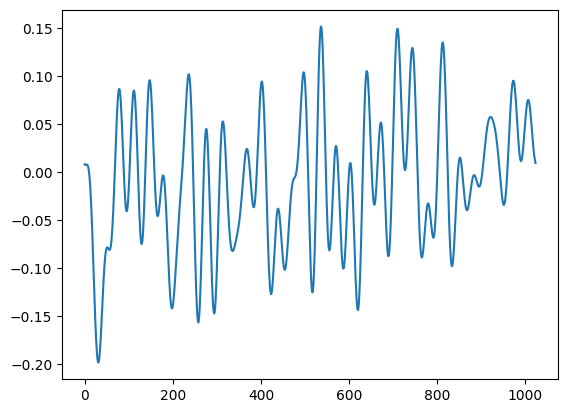

In [3]:
plt.plot(jnp.roll(tx_data['signal'].squeeze().real, 40))

In [30]:
Nch = 11
sps = 32
tx_data = simpleWDMTx(False, jax.random.PRNGKey(0), 1, 16, Nbits=1000000, sps=sps, Nch=Nch, Nmodes=1, Rs=80e9, freqspace=80e9*1.5, Pch_dBm=0, Ai=1, Vpi=2, Vb=-2, Ntaps=2**14, roll=0.1, pulse_type='rc', device='cuda:0')

Sample rate fa: 2.56e+12, Cut off frequency fc: 6.6e+11, fa > 2fc: True
 simpleWDMTx complete, time cost(s):2.775642156600952


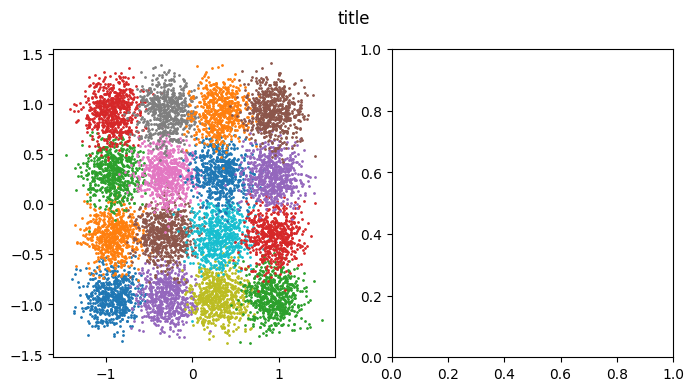

In [35]:
chid = Nch //2 
rx_sps = 2
t0 = -10000

sig = jnp.roll(tx_data['signal'], -t0*sps, axis=1)[:,0:sps*10000,:]
sym = jnp.roll(tx_data['SymbTx'], -t0, axis=1)[0,0:10000,chid]

rx_data = simpleRx(sig, tx_data['config'], jax.random.PRNGKey(1), chid, rx_sps, FO=0, lw=0, phi_lo=0,Plo_dBm=10, method='filtering', device='cpu')

show_symb(rx_data['signal'][0,0::rx_sps], sym, s=1)